# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.

num_mice = combined_data["Mouse ID"].nunique()

num_mice


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]

print(f"The following mice have duplicate records:\n{duplicate_mice['Mouse ID'].unique()}")


The following mice have duplicate records:
['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouse_id = duplicate_mice["Mouse ID"].iloc[0]


In [9]:
# Get all the data for the duplicate mouse ID

duplicate_mouse = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# Print the result
duplicate_mouse

array(['g989'], dtype=object)

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse)==False]
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.

num_mice = clean_data["Mouse ID"]

num_mice.nunique()


248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the data by regimen and calculate the summary statistics for tumor volume
regimen_summary = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns for readability
regimen_summary = regimen_summary.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})

# Print the summary statistics table
regimen_summary




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Round the summary statistics to two decimal places
summary = summary.round(2)

# Print the summary statistics table
summary




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

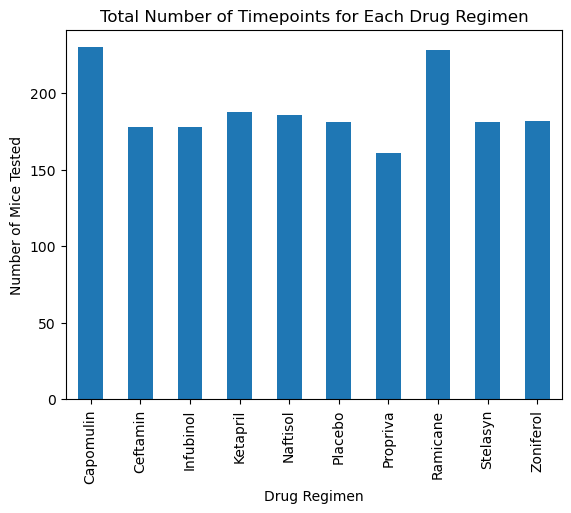

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create a bar plot of the counts using Pandas plot function

# Group the DataFrame by "Drug Regimen" and count the number of timepoints
counts = combined_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot of the counts using Pandas plot function
counts.plot(kind='bar')

# Set the title and axis labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Display the plot
plt.show()


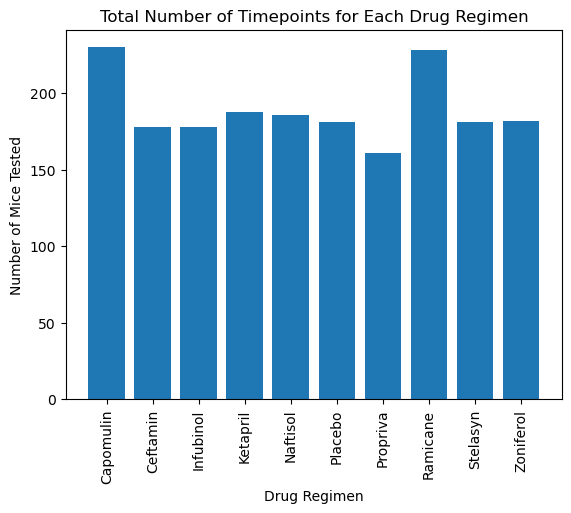

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Group the DataFrame by "Drug Regimen" and count the number of timepoints
counts = combined_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot of the counts using Pyplot bar function
plt.bar(counts.index, counts.values)

# Set the title and axis labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

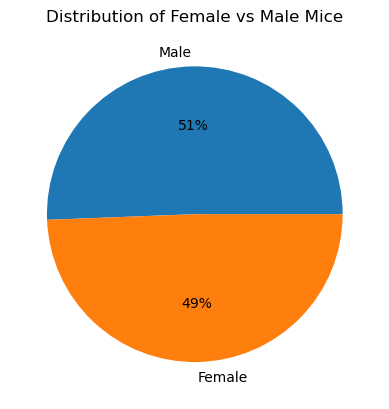

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of mice of each gender in the DataFrame
counts = combined_data['Sex'].value_counts()

# Create a pie plot of the counts using Pandas plot function
counts.plot(kind='pie', autopct='%1.0f%%')

# Set the title and axis labels
plt.title('Distribution of Female vs Male Mice')

plt.ylabel('')

# Display the plot
plt.show()



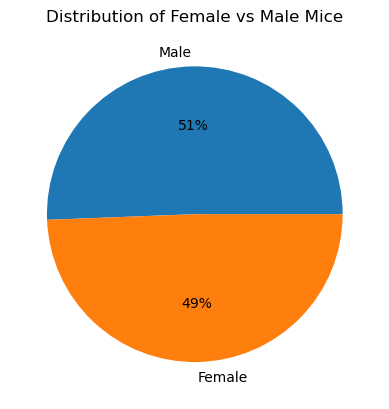

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of mice of each gender in the DataFrame
counts = combined_data['Sex'].value_counts()

# Create a pie plot of the counts using Pyplot pie function
plt.pie(counts.values, labels=counts.index, autopct='%1.0f%%')

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
combined_data_filtered = combined_data[combined_data['Drug Regimen'].isin(treatments)]

grouped = combined_data_filtered.groupby('Mouse ID')
max_timepoints = grouped['Timepoint'].max()

merged = pd.merge(combined_data_filtered, max_timepoints, on=['Mouse ID', 'Timepoint'])
tumor_volumes = merged[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

tumor_volumes


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
95,x822,Ceftamin,61.386660
96,y163,Infubinol,67.685569
97,y769,Ceftamin,68.594745
98,y865,Ceftamin,64.729837


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
    
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

for treatment in treatments:
    # Get the tumor volume data for the current treatment regimen
    volumes = combined_data[combined_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_volumes.append(volumes)
    
    # Calculate and print the quartiles and potential outliers
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"Results for {treatment}:")
    print(f"  - Lower quartile: {lowerq:.2f}")
    print(f"  - Upper quartile: {upperq:.2f}")
    print(f"  - Interquartile range (IQR): {iqr:.2f}")
    print(f"  - Median: {quartiles[0.5]:.2f}")
    print(f"  - Potential outliers: {outliers.tolist()}")
    print("\n")

    
    
    

Results for Capomulin:
  - Lower quartile: 37.69
  - Upper quartile: 45.00
  - Interquartile range (IQR): 7.31
  - Median: 41.56
  - Potential outliers: [25.47214326, 23.34359787]


Results for Ramicane:
  - Lower quartile: 36.67
  - Upper quartile: 45.00
  - Interquartile range (IQR): 8.33
  - Median: 40.67
  - Potential outliers: [22.05012627]


Results for Infubinol:
  - Lower quartile: 47.31
  - Upper quartile: 57.31
  - Interquartile range (IQR): 10.00
  - Median: 51.82
  - Potential outliers: []


Results for Ceftamin:
  - Lower quartile: 47.21
  - Upper quartile: 56.80
  - Interquartile range (IQR): 9.59
  - Median: 51.78
  - Potential outliers: []




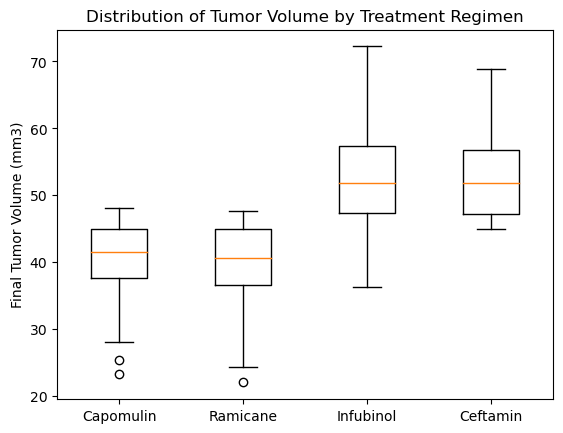

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Define the list of treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store the tumor volumes for each treatment
tumor_volumes = []

# Loop through each treatment and extract the tumor volumes
for treatment in treatments:
    volumes = combined_data.loc[combined_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volumes.append(volumes)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(tumor_volumes)

# Add labels and title
ax.set_xticklabels(treatments)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Tumor Volume by Treatment Regimen')

# Show the plot
plt.show()

## Line and Scatter Plots

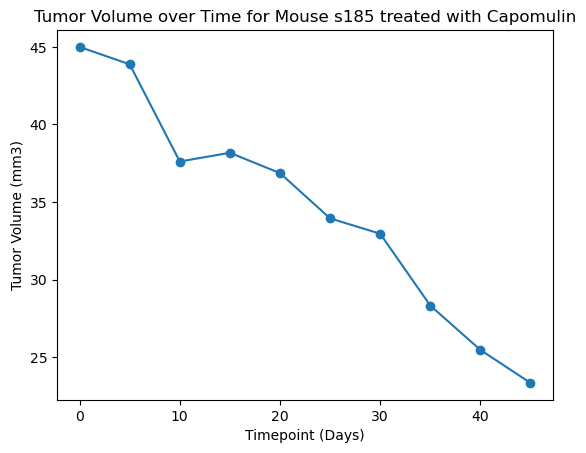

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Choose a mouse ID
mouse_id = 's185'

# Get the data for the chosen mouse treated with Capomulin
mouse_data = combined_data.loc[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == mouse_id), :]

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume over Time for Mouse {mouse_id} treated with Capomulin')

# Show the plot
plt.show()


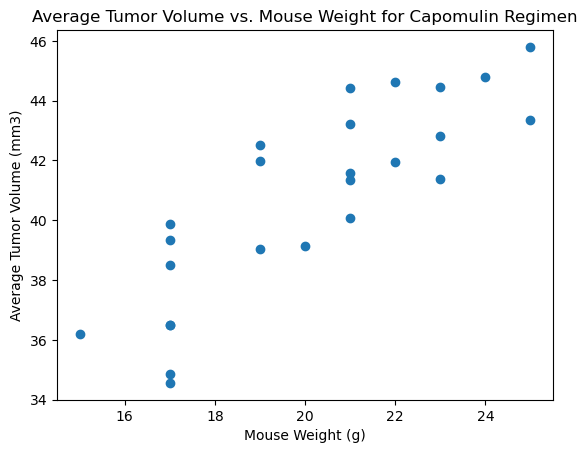

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# Get the data for the Capomulin regimen
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin', :]

# Calculate the average tumor volume and mouse weight for each mouse
mouse_stats = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Create the scatter plot
plt.scatter(mouse_stats['Weight (g)'], mouse_stats['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')

# Show the plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.84
The slope of the regression line is: 0.95
The y-intercept of the regression line is: 21.55
The correlation coefficient squared (R-squared) is: 0.71


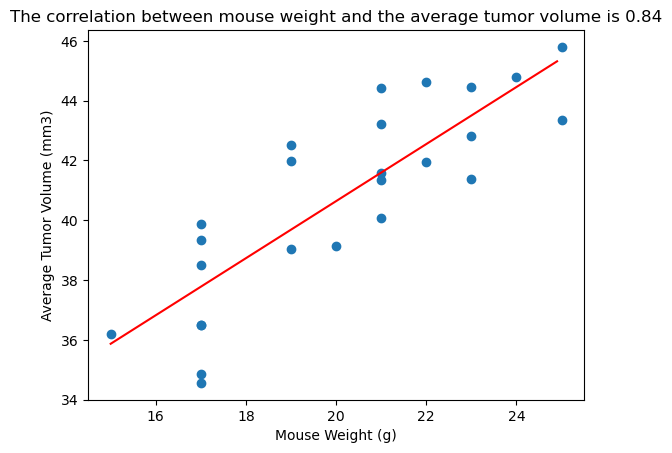

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Get the data for the Capomulin regimen
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin', :]

# Calculate the average tumor volume and mouse weight for each mouse
mouse_stats = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Calculate the correlation coefficient
corr_coef, _ = pearsonr(mouse_stats['Weight (g)'], mouse_stats['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is: {corr_coef:.2f}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_stats['Weight (g)'], mouse_stats['Tumor Volume (mm3)'])
print(f"The slope of the regression line is: {slope:.2f}")
print(f"The y-intercept of the regression line is: {intercept:.2f}")
print(f"The correlation coefficient squared (R-squared) is: {rvalue**2:.2f}")

# Create the scatter plot
plt.scatter(mouse_stats['Weight (g)'], mouse_stats['Tumor Volume (mm3)'])

# Add the regression line to the plot
x_vals = np.arange(mouse_stats['Weight (g)'].min(), mouse_stats['Weight (g)'].max(), 0.1)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('The correlation between mouse weight and the average tumor volume is 0.84')

# Show the plot
plt.show()

